# Visualize Learning Curves

In [1]:
import sys
from pathlib import Path

# Add the project root to the system path so that local module imports do not
# throw an exception
PROJECT_ROOT = Path('..').resolve()

if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

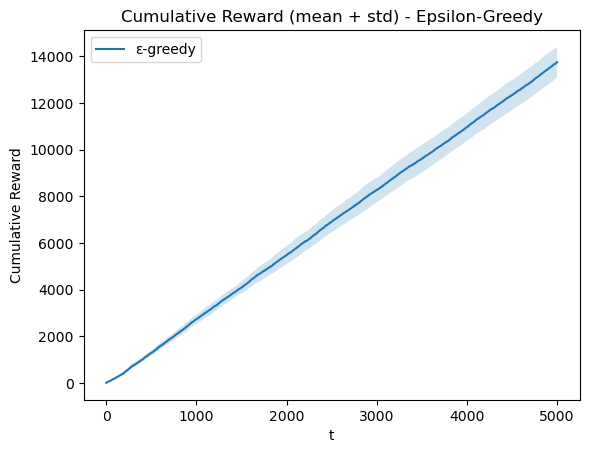

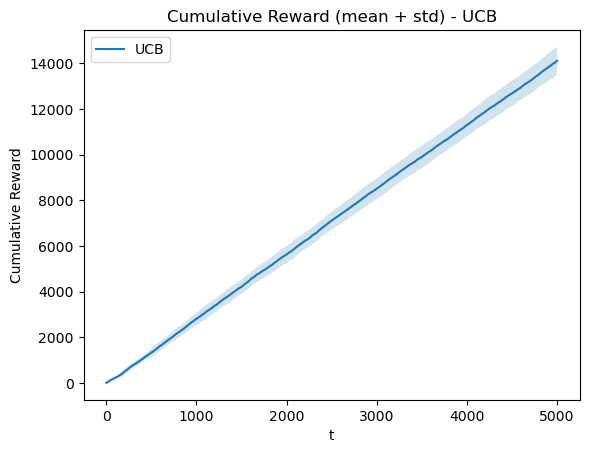

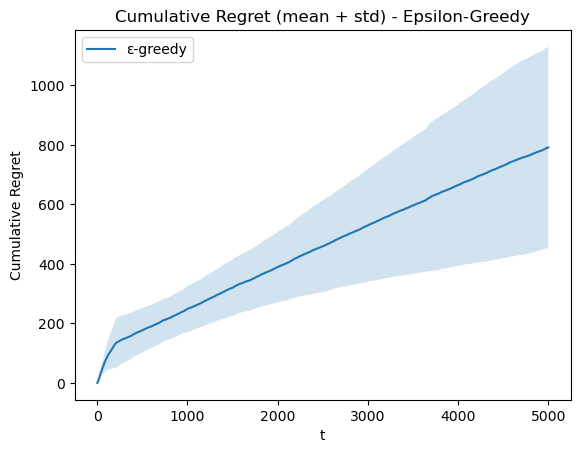

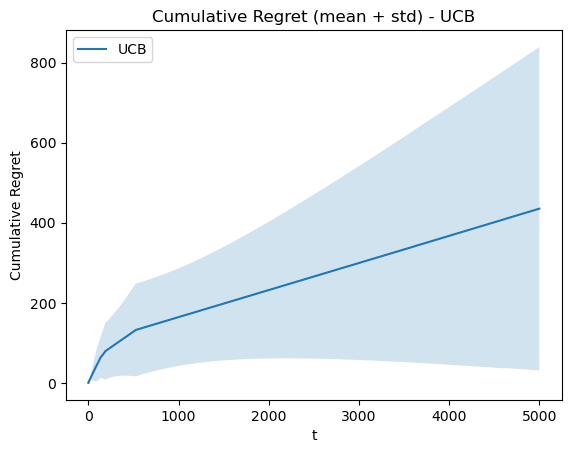

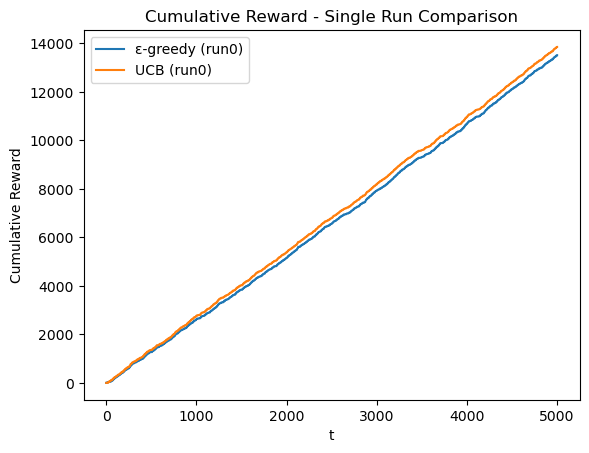

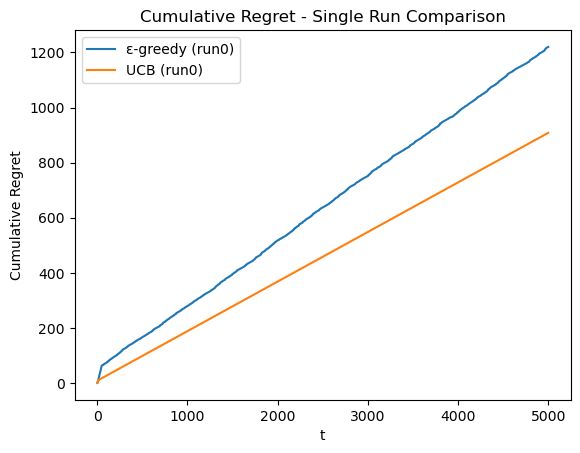

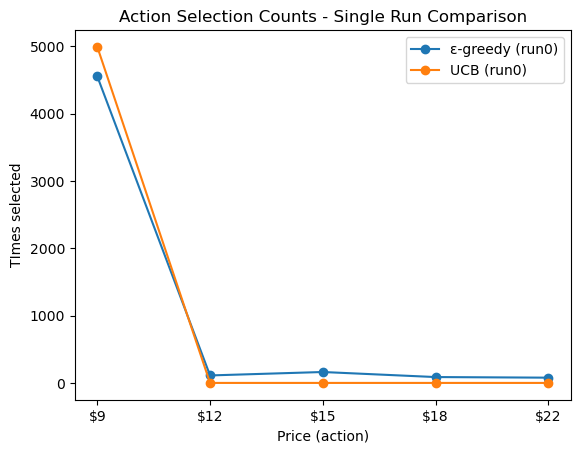

In [2]:
from src.experiment import run_many
from src.plotting import (
    plot_cumulative_reward, plot_cumulative_regret, plot_action_counts,
    summarize_runs, plot_mean_with_std
)

prices = [9, 12, 15, 18, 22]
probs = [0.30, 0.24, 0.10, 0.12, 0.07]  # Hidden truths

steps = 5000
n_runs = 8

eg_runs = run_many(prices, probs, agent_name='epsilon_greedy', steps=steps, n_runs=n_runs, epsilon=0.1)
ucb_runs= run_many(prices, probs, agent_name='ucb', steps=steps, n_runs=n_runs)

eg_summary = summarize_runs(eg_runs)
ucb_summary = summarize_runs(ucb_runs)

plot_mean_with_std(
    eg_summary,
    'cum_reward_mean',
    'cum_reward_std',
    title='Cumulative Reward (mean + std) - Epsilon-Greedy',
    ylabel='Cumulative Reward',
    label='ε-greedy',
    image_name='cum-reward-epsilon'
)

plot_mean_with_std(
    ucb_summary,
    'cum_reward_mean',
    'cum_reward_std',
    title='Cumulative Reward (mean + std) - UCB',
    ylabel='Cumulative Reward',
    label='UCB',
    image_name='cum-reward-ucb'
)

plot_mean_with_std(
    eg_summary,
    'cum_regret_mean',
    'cum_regret_std',
    title='Cumulative Regret (mean + std) - Epsilon-Greedy',
    ylabel='Cumulative Regret',
    label='ε-greedy',
    image_name='cum-regret-epsilon'
)

plot_mean_with_std(
    ucb_summary,
    'cum_regret_mean',
    'cum_regret_std',
    title='Cumulative Regret (mean + std) - UCB',
    ylabel='Cumulative Regret',
    label='UCB',
    image_name='cum-regret-ucb'
)

dfs_single = {
    'ε-greedy (run0)': eg_runs[0],
    'UCB (run0)': ucb_runs[0]
}

plot_cumulative_reward(dfs_single, title='Cumulative Reward - Single Run Comparison', image_name='cum-reward-single-run')
plot_cumulative_regret(dfs_single, title='Cumulative Regret - Single Run Comparison', image_name='cum-regret-single-run')
plot_action_counts(dfs_single, prices, title='Action Selection Counts - Single Run Comparison')